# Iris dataset

In [85]:
#Import the labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report

# load the dataset

In [86]:
df=pd.read_csv('C:\\Users\\PMLS\\Favorites\\Machine learning &classification\\Iris.csv')
df

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [87]:
df.head(10)

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [88]:
df.tail()

,petal_length,petal_width,sepal_length,sepal_width,label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [89]:
df.shape

(150, 5)

# Checks the uniques_values

In [90]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in petal_length: [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
Unique values in petal_width: [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
Unique values in sepal_length: [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
Unique values in sepal_width: [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Unique values in label: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [92]:
df.describe()

,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [93]:
# Apply map () to convert the catagorical columns into numerics
df['label'] = df['label'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   label         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [95]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in petal_length: [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
Unique values in petal_width: [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
Unique values in sepal_length: [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
Unique values in sepal_width: [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Unique values in label: [0 1 2]


# Checks the missing values

In [96]:
df.isnull().sum()

petal_length    0
petal_width     0
sepal_length    0
sepal_width     0
label           0
dtype: int64

In [97]:
df.fillna(0, inplace=True)  # fills all NaNs with 0


In [98]:
df.isnull().sum()

petal_length    0
petal_width     0
sepal_length    0
sepal_width     0
label           0
dtype: int64

<Axes: xlabel='petal_width', ylabel='Count'>

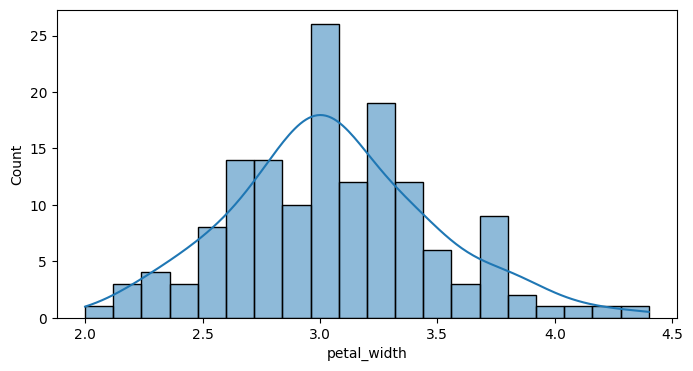

In [99]:
plt.figure(figsize=(8,4))
sns.histplot(df['petal_width'],bins=20,kde='True')

C:\Users\PMLS\AppData\Local\Temp\ipykernel_8968\951385044.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal_length'],bins=21,kde='True')


<Axes: xlabel='sepal_length', ylabel='Density'>

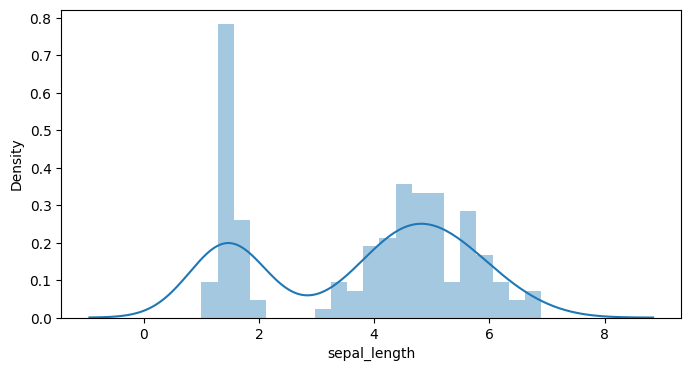

In [100]:
plt.figure(figsize=(8,4))
sns.distplot(df['sepal_length'],bins=21,kde='True')

C:\Users\PMLS\AppData\Local\Temp\ipykernel_8968\1634526004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='petal_length', palette='viridis')


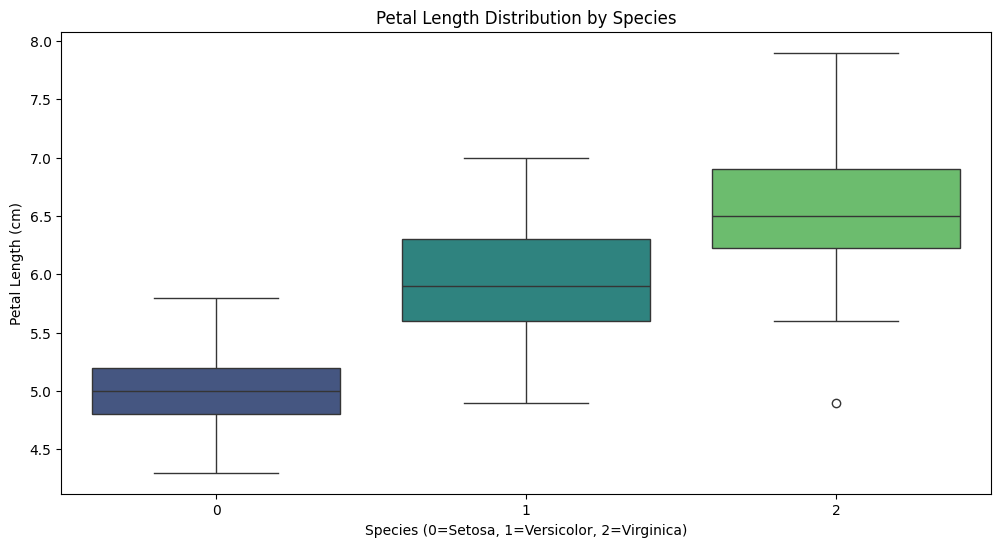

In [101]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='label', y='petal_length', palette='viridis')
plt.title("Petal Length Distribution by Species")
plt.xlabel("Species (0=Setosa, 1=Versicolor, 2=Virginica)")
plt.ylabel("Petal Length (cm)")
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_8968\3230185333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='label', y='sepal_width', palette='viridis')


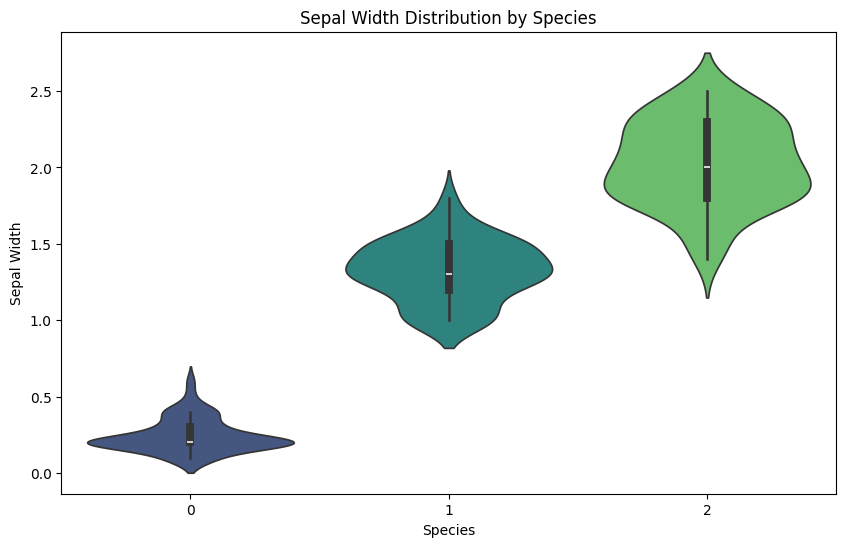

In [102]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='label', y='sepal_width', palette='viridis')
plt.title("Sepal Width Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width")
plt.show()

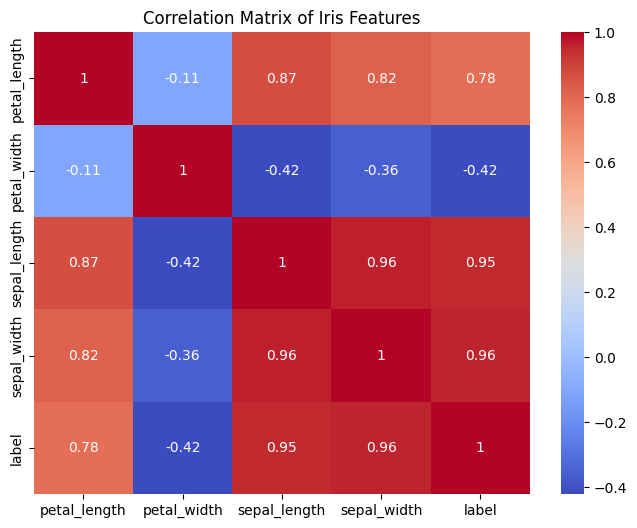

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Iris Features")
plt.show()

# Split the data

In [104]:
X=df.drop(columns=['label'])
y=df['label']

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [106]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [112]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
# predict the model
pred=model.predict(X_test)


from sklearn.metrics import accuracy_score,precision_score,f1_score
print('accuracu_score:',accuracy_score(y_test,pred))
print('precision_score:',precision_score(y_test,pred,average='micro'))
print('f1_score:',f1_score(y_test,pred,average='micro'))

accuracu_score: 0.9666666666666667
precision_score: 0.9666666666666667
f1_score: 0.9666666666666667


In [108]:
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,f1_score
print('accuracu_score:',accuracy_score(y_test,pred1))
print('precision_score:',precision_score(y_test,pred1,average='micro'))
print('f1_score:',f1_score(y_test,pred1,average='micro'))

accuracu_score: 0.9666666666666667
precision_score: 0.9666666666666667
f1_score: 0.9666666666666667


In [109]:
model2=RandomForestClassifier()
model2.fit(X_train,y_train)

pred2=model2.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,f1_score
print('accuracu_score:',accuracy_score(y_test,pred2))
print('precision_score:',precision_score(y_test,pred,average='micro'))
print('f1_score:',f1_score(y_test,pred,average='micro'))

accuracu_score: 0.9666666666666667
precision_score: 0.9666666666666667
f1_score: 0.9666666666666667


In [110]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Create and train the model
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train, y_train)

# Make predictions
pred3 = model3.predict(X_test)

# Evaluate performance
print("Accuracy Score:", accuracy_score(y_test, pred3))
print("Precision Score:", precision_score(y_test, pred3, average='micro'))
print("F1 Score:", f1_score(y_test, pred3, average='micro'))


Accuracy Score: 0.9666666666666667
Precision Score: 0.9666666666666667
F1 Score: 0.9666666666666667
